# Basic Example - Robust PCA

Review Date: 05-08-2018
**Update: 05-15-2020**

Examples
* Reviewed functions and behavior with sunspot dataset.
* Nextflix Tests


*In this notebook I only make test of Robust PCA.*

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sunspots=pd.read_table("http://www.sidc.be/silso/INFO/snmtotcsv.php",header=None,sep=';')

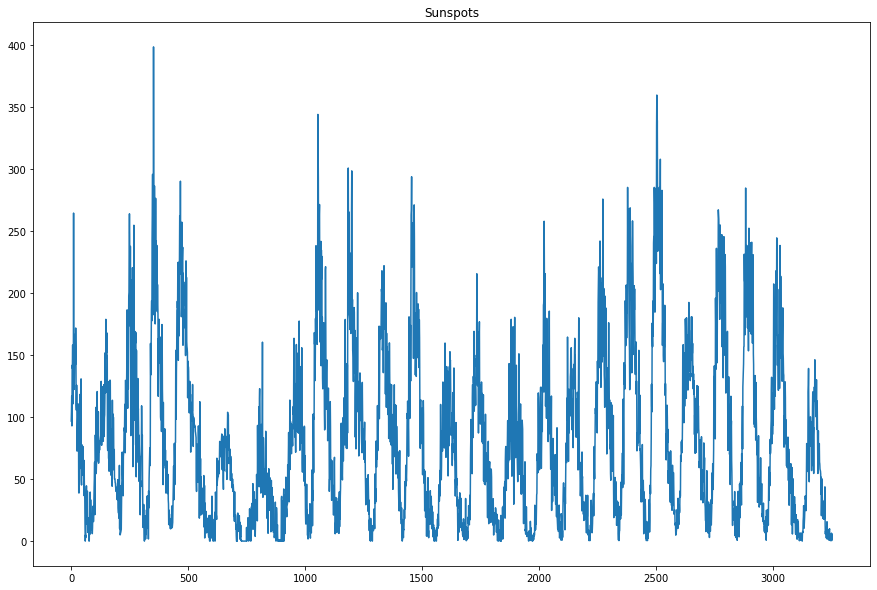

In [4]:
sunspots.iloc[:,3].plot(figsize=(15,10),title='Sunspots')

In [6]:
TimeSerie=sunspots.iloc[:,3]
TimeSerie.head()

0     96.7
1    104.3
2    116.7
3     92.8
4    141.7
Name: 3, dtype: float64

In [7]:
%cd ..

/home/dlegorreta/Documentos/Repositories_Github/rad


In [8]:
#Main Function
from rad import AnomalyDetection_RPCA

In [9]:
Mod1=AnomalyDetection_RPCA(verbose=False)

In [10]:
Mod1.fit(X=TimeSerie)

AnomalyDetection_RPCA(Lpenalty=1.0, Spenalty=-1.0, autodiff=True,
                      forcediff=False, frequency=7, scale=True, verbose=False)

Total Outliers:292


<Figure size 1080x576 with 0 Axes>

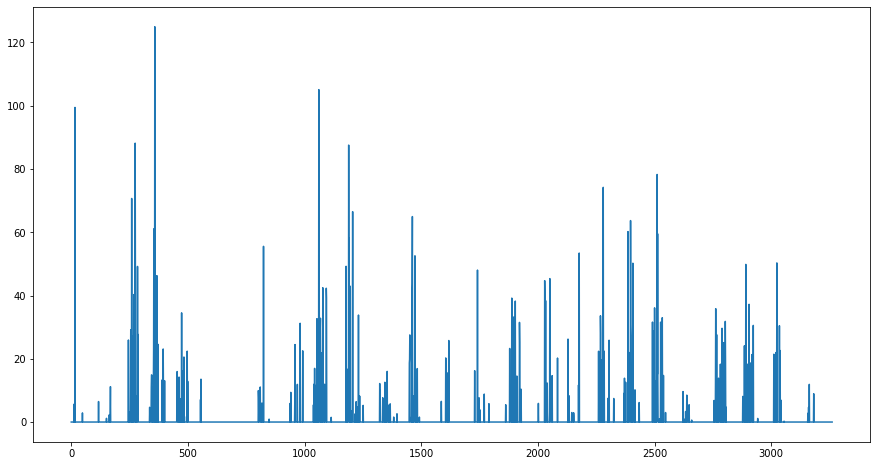

In [11]:
#Check outliers
Outliers=Mod1.get_outliers()
print("Total Outliers:{}".format(np.count_nonzero(Outliers)))

plt.figure(figsize=(15,8))
plt.plot(range(len(Outliers)),Outliers)


Total Outliers Chosen:77


<Figure size 1080x576 with 0 Axes>

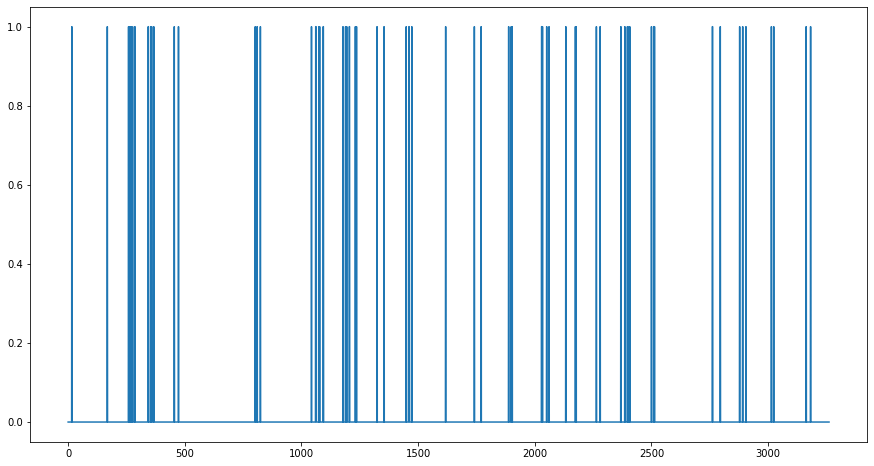

In [12]:
#Check Decision Function
#Array with 0's and 1's
Outliers=Mod1.decision_function()
print("Total Outliers Chosen:{}".format(np.count_nonzero(Outliers)))

plt.figure(figsize=(15,8))
plt.plot(range(len(Outliers)),Outliers)


<Figure size 1080x576 with 0 Axes>

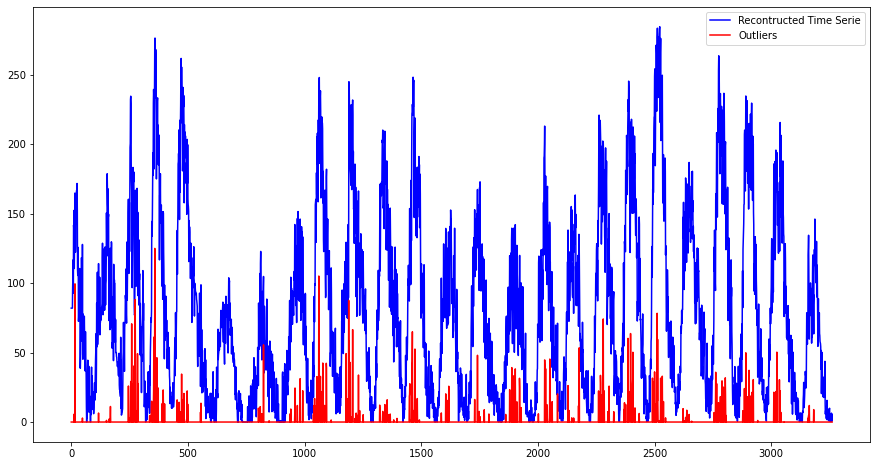

In [13]:
#Check Transform
#Return L, S , E vectors
L,S,E=Mod1.transform(X=TimeSerie)

plt.figure(figsize=(15,8))
plt.plot(range(len(L)),L+E,c='blue',label='Recontructed Time Serie')
plt.plot(range(len(L)),np.abs(S),c='red',label='Outliers')
plt.legend()
plt.show()

In [14]:
#Check fit_transform: fit and Transform together
Mod1.fit_transform(X=TimeSerie)

(array([82.07693841, 82.04077689, 82.1409698 , ...,  2.26535954,
         3.42916074,  6.50692968]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0.1028905 , -0.06672897, -0.16692189, ..., -1.86535954,
        -1.92916074, -1.10692968]))

In [15]:
#Num of Outliers
N=Mod1.num_outliers()
print("Num Outlieres :{}".format(N))

Num Outlieres :292


In [16]:
Mod1.to_frame(X=TimeSerie)

,X_original,L_transform,S_transform,E_transform,Mad_Outliers
0,0.0,82.076938,-0.0,-0.102890,0
1,0.0,82.040777,-0.0,-0.066729,0
2,0.0,82.140970,-0.0,-0.166922,0
3,0.0,82.304564,-0.0,-0.330517,0
4,0.0,82.342174,-0.0,-0.368126,0
...,...,...,...,...,...
3257,1.5,3.147983,-0.0,-1.647983,0
3258,6.4,6.888262,-0.0,-0.488262,0
3259,0.4,2.265360,-0.0,-1.865360,0
3260,1.5,3.429161,-0.0,-1.929161,0


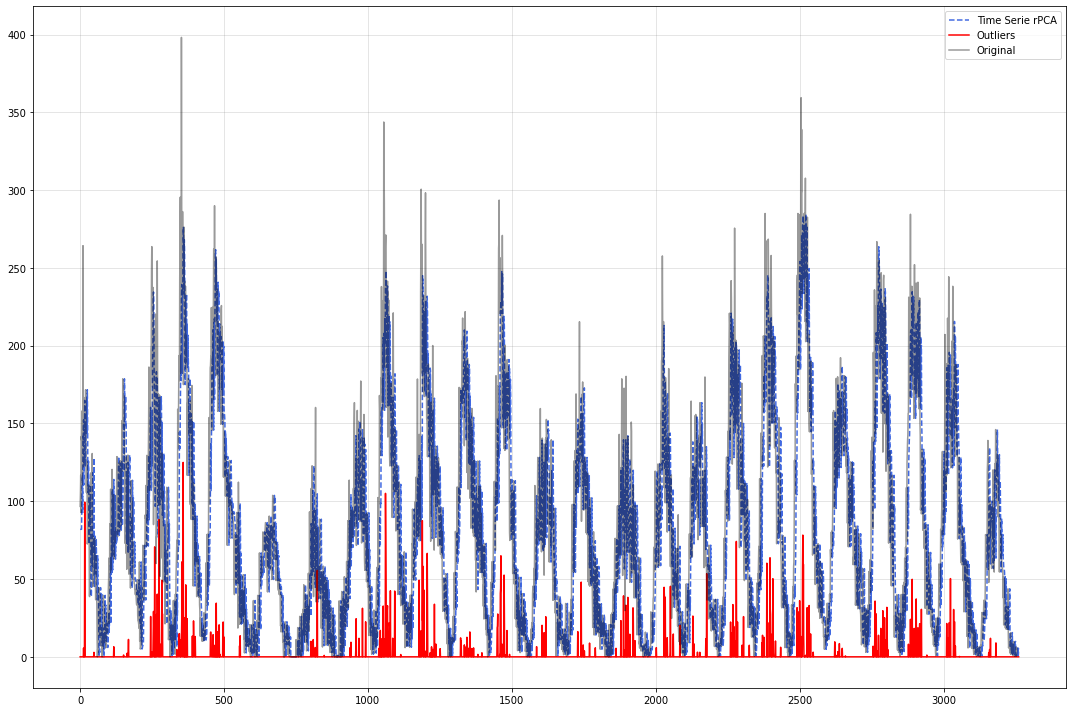

In [18]:
Mod1.plot(figsize=(15,10))
plt.plot(range(len(TimeSerie)),TimeSerie,c='k',alpha=0.4,label='Original')
plt.legend()

In [19]:
print("There are %d outliers of the total %d  observations."%(Mod1.num_outliers(),TimeSerie.shape[0]))

There are 292 outliers of the total 3256  observations.


## Netflix's Test

Reference of Original Test: https://github.com/Netflix/Surus/tree/master/resources/R/RAD/tests

In [20]:
#Serie Test 1 :signal with weekly periodicity.

Serie_Test1=np.sin((2*np.pi)/7*np.array(range(1,71)))

<Figure size 864x576 with 0 Axes>

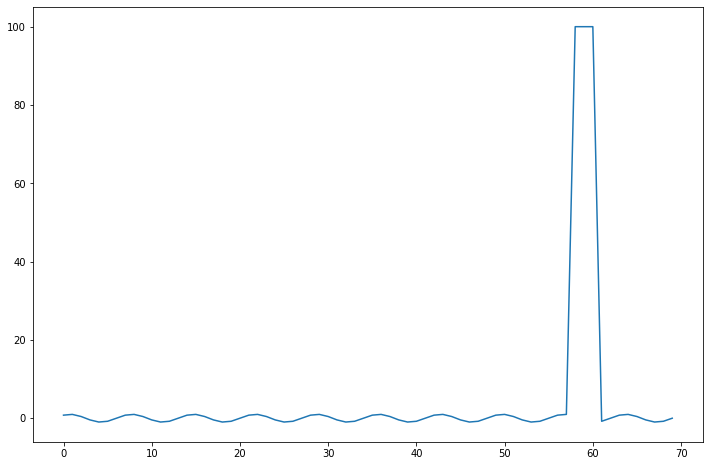

In [32]:
plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test1)),Serie_Test1)


In [25]:
#Outliers days: 58,59 and 60.
Serie_Test1[58:61]=100

<Figure size 864x576 with 0 Axes>

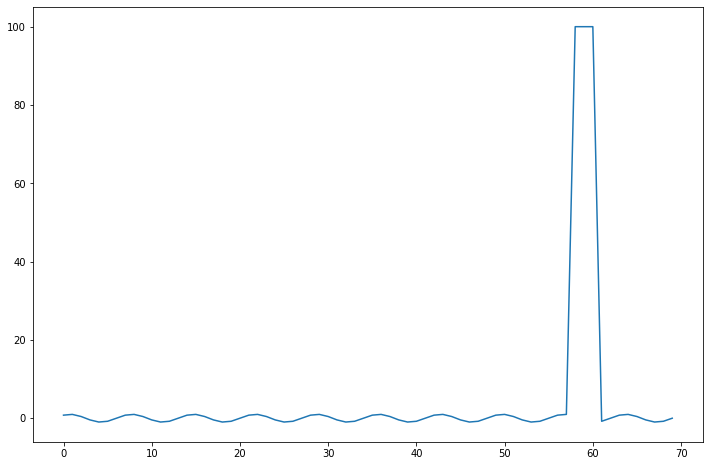

In [33]:
plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test1)),Serie_Test1)

In [29]:
#Model RAD
Mod2=AnomalyDetection_RPCA(verbose=False,autodiff=False).fit(X=Serie_Test1)

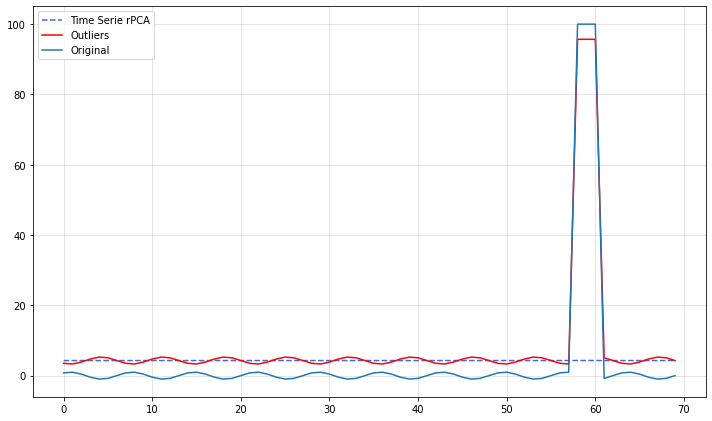

In [34]:
Mod2.plot()
plt.plot(range(len(Serie_Test1)),Serie_Test1,label='Original')
plt.legend()

## Test 2

Signal with weekly periodicity. There is a consistent increasing linear trend. An anomaly occurs on days 69 and 70.

In [35]:
Serie_Test2=Serie_Test1+np.array(range(1,71))+np.random.rand(1,70)

In [36]:
Serie_Test2=Serie_Test2.reshape(-1,1).ravel()

<Figure size 864x576 with 0 Axes>

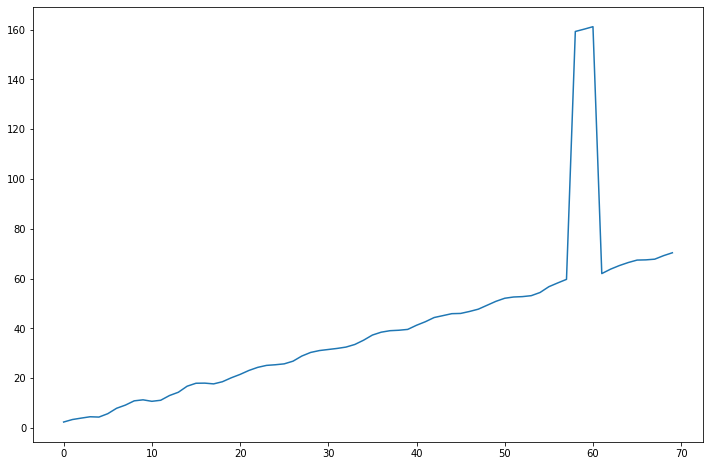

In [38]:
plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test2)),Serie_Test2)

In [39]:
Mod2=AnomalyDetection_RPCA(verbose=True).fit(X=Serie_Test2)

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Objective function: 4.18330013  on previous iteration 0 
Objective function: 7.32168503  on iteration 1 
Objective function: 7.32168503  on previous iteration 1 
Objective function: 2.85266511  on iteration 2 
Objective function: 2.85266511  on previous iteration 2 
Objective function: 1.45074969  on iteration 3 
Objective function: 1.45074969  on previous iteration 3 
Objective function: 1.17303050  on iteration 4 
Objective function: 1.17303050  on previous iteration 4 
Objective function: 1.12972593  on iteration 5 
Objective function: 1.12972593  on previous iteration 5 
Objective function: 1.11997306  on iteration 6 
Objective function: 1.11997306  on previous iteration 6 
Objective function: 1.11777448  on iteration 7 
Objective function: 1.11777448  on previous iteration 7 
Objective function: 1.11728129  on iteration 8 
Objective function: 1.11728129  on previous iteration 8 
Objective function: 1.1

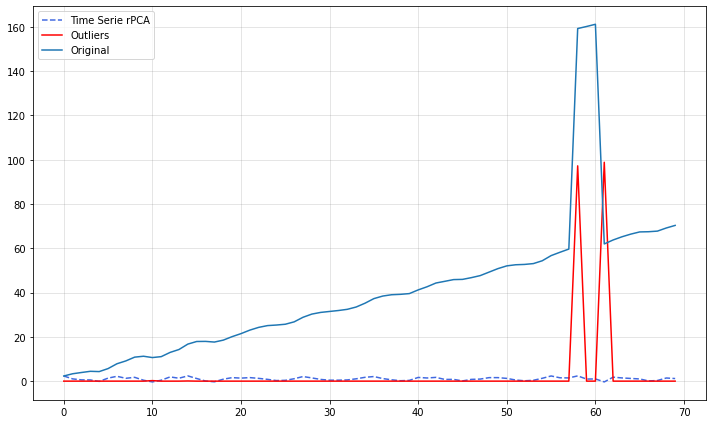

In [40]:
Mod2.plot()
plt.plot(range(len(Serie_Test1)),Serie_Test2,label='Original')
plt.legend()


## Test 3 
Signal with no periodicity. The signal is the cumulative sum of the cumulative sum of random noise. An anomaly occurs on days 50, 51, and 52.

In [41]:
Serie_Test3=np.cumsum(np.random.normal(1,1,size=70))

In [42]:
#Outliers Controlados
Serie_Test3[50:53]=100

<Figure size 864x576 with 0 Axes>

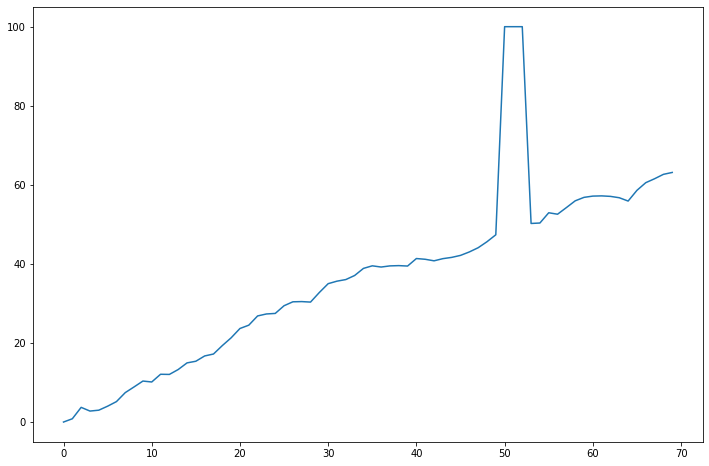

In [43]:
plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test3)),Serie_Test3)

In [44]:
Mod2=AnomalyDetection_RPCA(verbose=True).fit(X=Serie_Test3)

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Objective function: 4.18330013  on previous iteration 0 
Objective function: 7.21898577  on iteration 1 
Objective function: 7.21898577  on previous iteration 1 
Objective function: 3.81310849  on iteration 2 
Objective function: 3.81310849  on previous iteration 2 
Objective function: 3.10623394  on iteration 3 
Objective function: 3.10623394  on previous iteration 3 
Objective function: 3.01385603  on iteration 4 
Objective function: 3.01385603  on previous iteration 4 
Objective function: 3.00140043  on iteration 5 
Objective function: 3.00140043  on previous iteration 5 
Objective function: 2.99929548  on iteration 6 
Objective function: 2.99929548  on previous iteration 6 
Objective function: 2.99894070  on iteration 7 
Objective function: 2.99894070  on previous iteration 7 
Objective function: 2.99888093  on iteration 8 
Objective function: 2.99888093  on previous iteration 8 
Objective function: 2.9

In [45]:
Mod2.to_frame(X=Serie_Test3).head()

,X_original,L_transform,S_transform,E_transform,Mad_Outliers
0,-0.053676,0.90159,-0.000000,-0.955266,0
1,0.828370,0.90159,-0.000000,-0.073221,0
2,2.884446,0.90159,0.038763,1.944093,1
3,-0.937697,0.90159,-0.000000,-1.839288,0
4,0.224373,0.90159,-0.000000,-0.677217,0


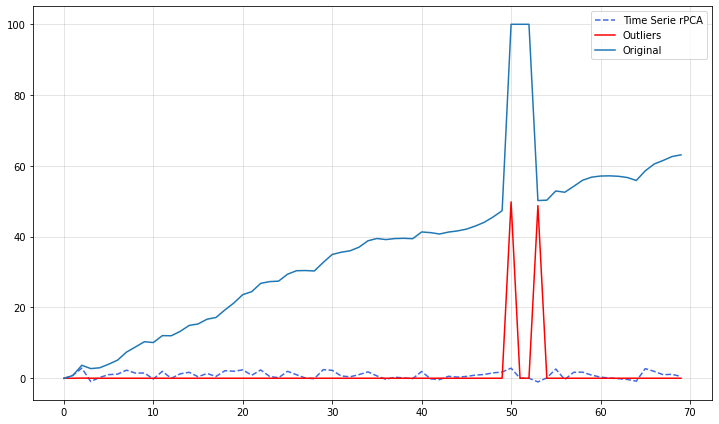

In [46]:
Mod2.plot()
plt.plot(range(len(Serie_Test3)),Serie_Test3,label='Original')
plt.legend()


## Test 4

Similar to test 3

In [47]:
#Data
Serie_Test4=np.cumsum(np.random.normal(5,5,size=70))

In [48]:
#Outliers 
Serie_Test4[50:53]=100

In [59]:
Mod2=AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test4))

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 7.63094388  on iteration 1 
Objective function: 7.63094388  on previous iteration 1 
Objective function: 3.70042912  on iteration 2 
Objective function: 3.70042912  on previous iteration 2 
Objective function: 3.69547890  on iteration 3 
Objective function: 3.69547890  on previous iteration 3 
Objective function: 3.69356967  on iteration 4 
Objective function: 3.69356967  on previous iteration 4 
Objective function: 3.69280605  on iteration 5 
Objective function: 3.69280605  on previous iteration 5 
Objective function: 3.69246979  on iteration 6 
Objective function: 3.69246979  on previous iteration 6 
Objective function: 3.69230344  on iteration 7 
Objective function: 3.69230344  on previous iteration 7 
Objective function: 3.69221156  on iteration 8 
Objective function: 3.69221156 

In [50]:
Mod2.to_frame(X=Serie_Test4).head()

,X_original,L_transform,S_transform,E_transform,Mad_Outliers
0,2.064025,0.90159,-0.000000,-0.955266,0
1,7.505974,0.90159,-0.000000,-0.073221,0
2,11.837800,0.90159,0.038763,1.944093,1
3,-0.502621,0.90159,-0.000000,-1.839288,0
4,1.216585,0.90159,-0.000000,-0.677217,0


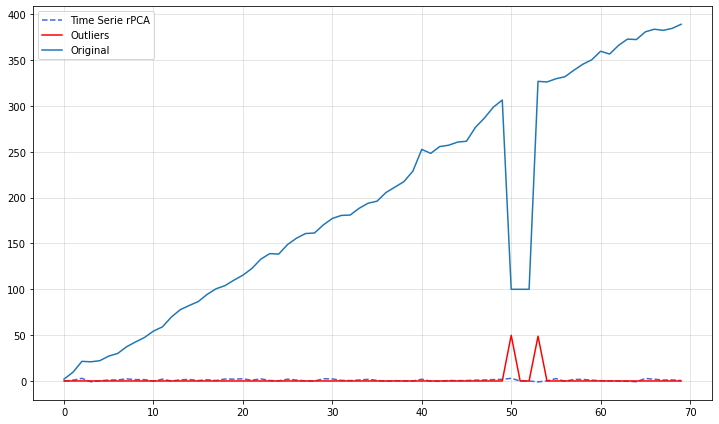

In [52]:
Mod2.plot()
plt.plot(range(len(Serie_Test4)),Serie_Test4,label='Original')
plt.legend()


## Test 5


Outliers in differentes period, similar to the test 1.

<Figure size 864x576 with 0 Axes>

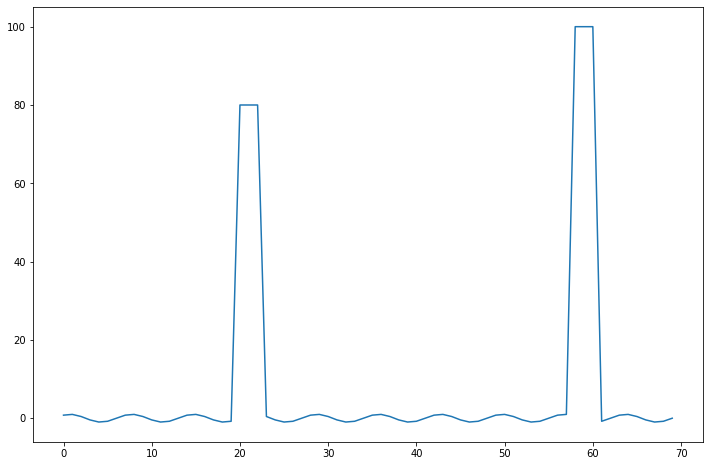

In [54]:
Serie_Test5=np.sin((2*np.pi)/7*np.array(range(1,71)))

#Outliers
Serie_Test5[58:61]=100
Serie_Test5[20:23]=80

plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test5)),Serie_Test5)

In [55]:
Mod2=AnomalyDetection_RPCA(verbose=True,autodiff=False).fit(X=pd.Series(Serie_Test5))
Mod2.to_frame(X=Serie_Test5).head()

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Objective function: 4.18330013  on previous iteration 0 
Objective function: 13.38384424  on iteration 1 
Objective function: 13.38384424  on previous iteration 1 
Objective function: 8.35552691  on iteration 2 
Objective function: 8.35552691  on previous iteration 2 
Objective function: 7.65892032  on iteration 3 
Objective function: 7.65892032  on previous iteration 3 
Objective function: 7.21508501  on iteration 4 
Objective function: 7.21508501  on previous iteration 4 
Objective function: 6.99565082  on iteration 5 
Objective function: 6.99565082  on previous iteration 5 
Objective function: 6.55033624  on iteration 6 
Objective function: 6.55033624  on previous iteration 6 
Objective function: 6.07796321  on iteration 7 
Objective function: 6.07796321  on previous iteration 7 
Objective function: 5.71007516  on iteration 8 
Objective function: 5.71007516  on previous iteration 8 
Objective function: 5

,X_original,L_transform,S_transform,E_transform,Mad_Outliers
0,0.781831,4.026963,-0.0,-3.245132,0
1,0.974928,4.135222,-0.0,-3.160294,0
2,0.433884,3.446424,-0.0,-3.012540,0
3,-0.433884,2.936890,-0.0,-3.370774,0
4,-0.974928,2.633555,-0.0,-3.608483,0


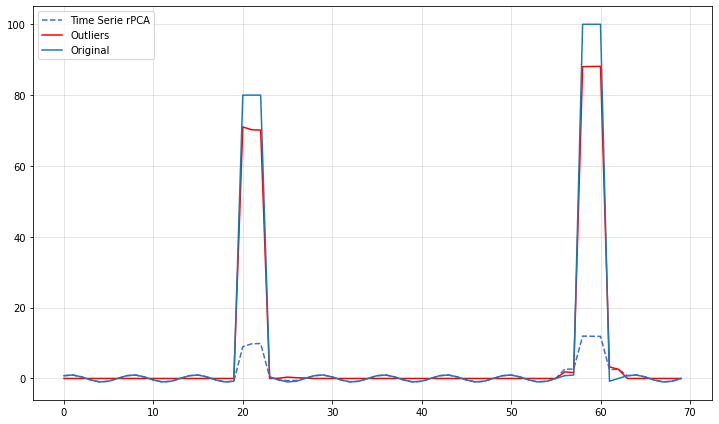

In [61]:
Mod2.plot()
plt.plot(range(len(Serie_Test5)),Serie_Test5,label='Original')
plt.legend()

## Test 6

Similar to the test 3 + Test 4 with outlier in differentes period.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Time Serie')

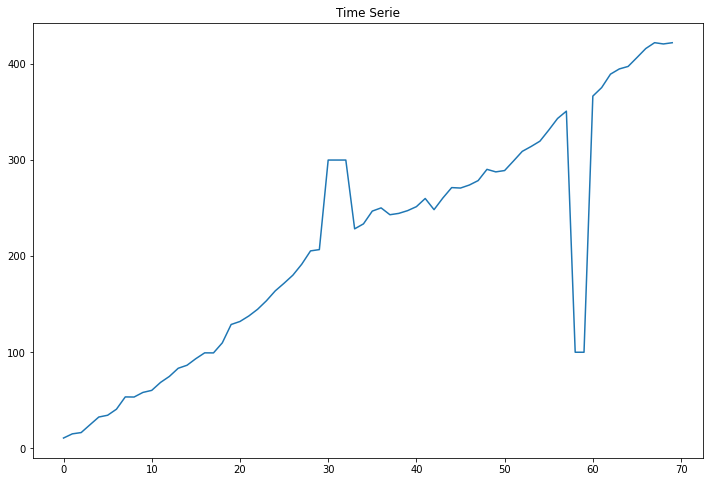

In [62]:
Serie_Test6=np.cumsum(np.random.normal(1,1,size=70)+np.random.normal(5,5,size=70))

#Outliers
Serie_Test6[58:60]=100
Serie_Test6[30:33]=300

plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test6)),Serie_Test6)
plt.title("Time Serie")

In [63]:
Mod2=AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test6))
Mod2.to_frame(X=Serie_Test6).head()

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Objective function: 4.18330013  on previous iteration 0 
Objective function: 9.09684566  on iteration 1 
Objective function: 9.09684566  on previous iteration 1 
Objective function: 5.01765828  on iteration 2 
Objective function: 5.01765828  on previous iteration 2 
Objective function: 4.61175077  on iteration 3 
Objective function: 4.61175077  on previous iteration 3 
Objective function: 4.02426728  on iteration 4 
Objective function: 4.02426728  on previous iteration 4 
Objective function: 3.78411685  on iteration 5 
Objective function: 3.78411685  on previous iteration 5 
Objective function: 3.68369551  on iteration 6 
Objective function: 3.68369551  on previous iteration 6 
Objective function: 3.64326961  on iteration 7 
Objective function: 3.64326961  on previous iteration 7 
Objective function: 3.62726231  on iteration 8 
Objective function: 3.62726231  on previous iteration 8 
Objective function: 3.6

,X_original,L_transform,S_transform,E_transform,Mad_Outliers
0,10.722385,6.029839,0.0,4.692546,0
1,4.355450,6.029839,-0.0,-1.674389,0
2,1.325675,6.029839,-0.0,-4.704163,0
3,8.127838,6.029839,0.0,2.097999,0
4,8.047813,6.029839,0.0,2.017974,0


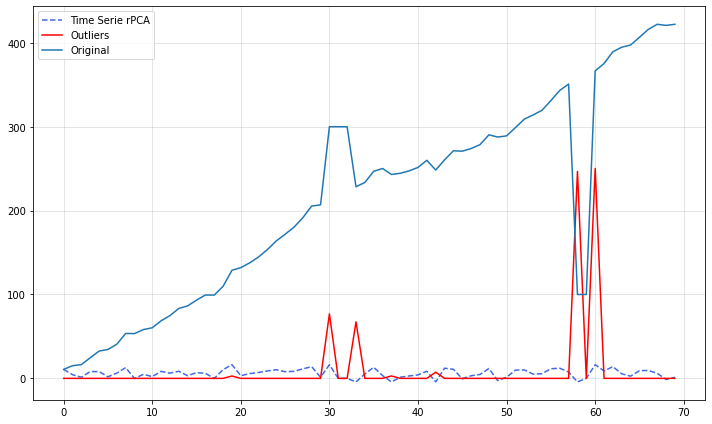

In [65]:
Mod2.plot()
plt.plot(range(len(Serie_Test6)),Serie_Test6,label='Original')
plt.legend()

## Test 7 

Similar to the test 6, but with longer time serie.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Time Serie')

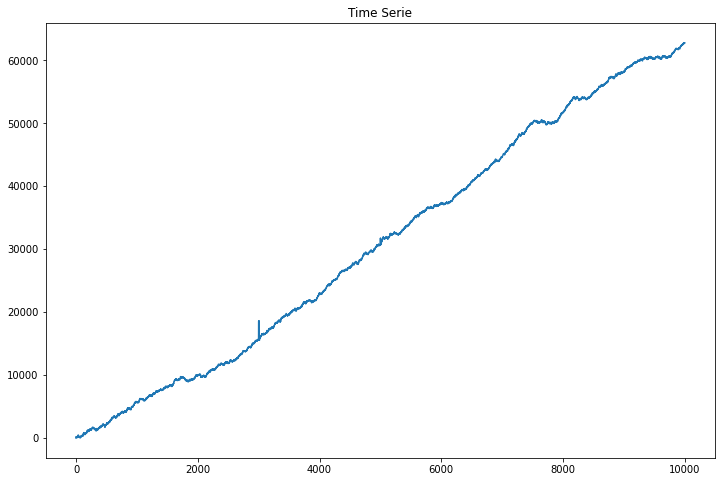

In [69]:
Serie_Test7=np.cumsum(np.random.normal(1,20,size=10000)+np.random.normal(5,35,size=10000))

#Outliers
Serie_Test7[5000:5003]=1000+Serie_Test7[5000:5003]
Serie_Test7[3000:3010]=3000+Serie_Test7[3000:3010]

plt.figure(figsize=(12,8))
plt.plot(range(len(Serie_Test7)),Serie_Test7)
plt.title("Time Serie")

In [70]:
%%time

Mod2=AnomalyDetection_RPCA(verbose=False).fit(X=pd.Series(Serie_Test7))
#Mod2.to_frame().head()

CPU times: user 2.61 s, sys: 193 ms, total: 2.8 s
Wall time: 1.71 s


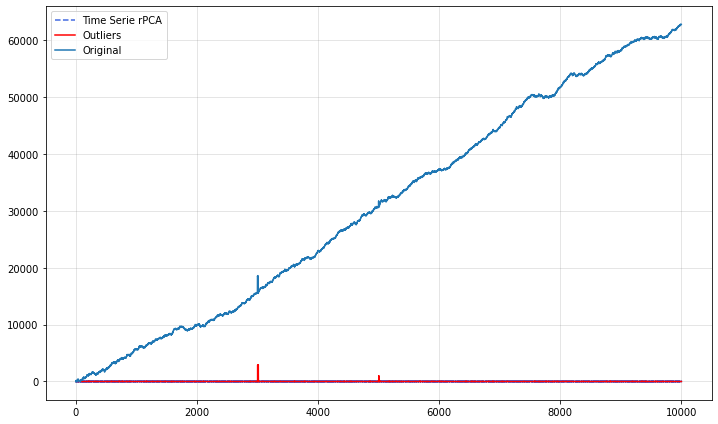

In [71]:
Mod2.plot()
plt.plot(range(len(Serie_Test7)),Serie_Test7,label='Original')
plt.legend()
